In [1]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;
from tqdm import tqdm;
%matplotlib inline

# Tensorflow Notebook
In this notebook, we will program/develop a classification Neural network using keras and tensoflow libraries

<strong>Dataset used: </strong> Cancer dataset

In [2]:
df = pd.read_csv ('./TensorFlow_FILES/DATA/cancer_classification.csv');
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<strong> Target column: </strong> 'benign_0__mal_1'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Text(79.0, 0.5, 'Rows')

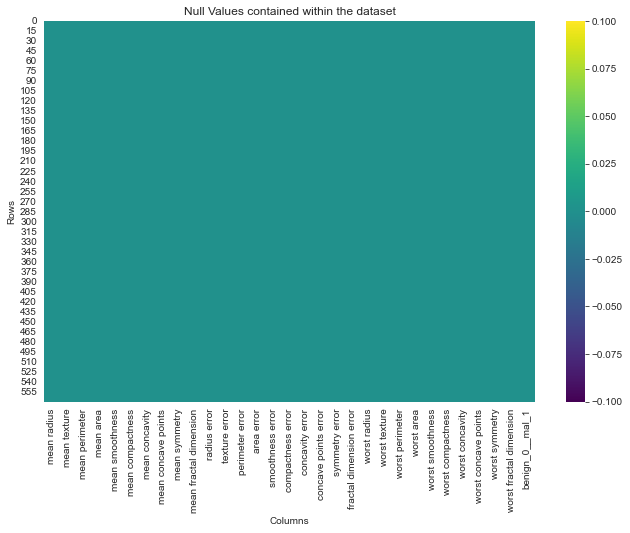

In [4]:
sns.set_style('darkgrid')
plt.figure(figsize = (11, 7))
sns.heatmap(df.isnull(), cmap = 'viridis')
plt.title ('Null Values contained within the dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

Therefore, there are <strong>no null values</strong> in the dataset

Let's check if it is a balanced dataset or not...

Text(0.5, 1.0, 'A count-based breakdown of the target value')

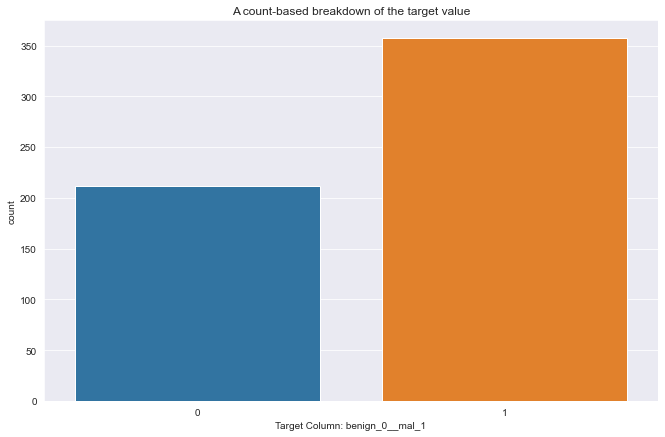

In [5]:
plt.figure(figsize = (11, 7))
sns.countplot(data = df, x= 'benign_0__mal_1')
plt.xlabel('Target Column: benign_0__mal_1')
plt.title('A count-based breakdown of the target value')

seems to have a disparity but overall is well balanced since it's in a 9:14 ratio whereas usually cancer datasets tend to be in 1:10 ratios

<Axes: >

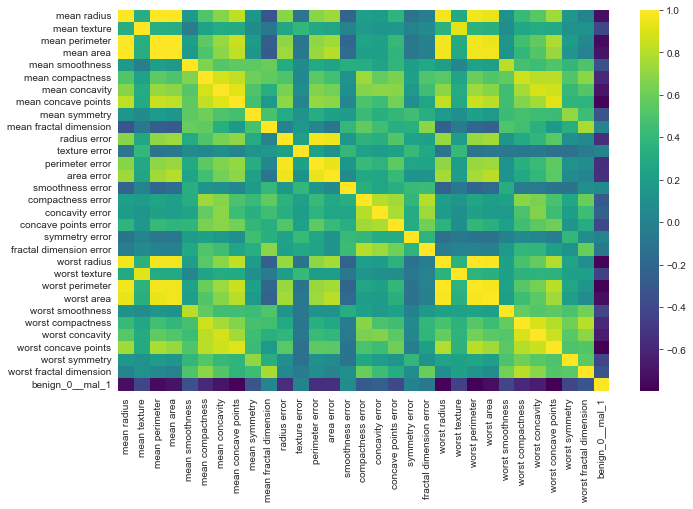

In [6]:
## map out the correlation values for each column in the dataset

plt.figure(figsize = (11, 7))
sns.heatmap(df.corr(), cmap = 'viridis')

<Axes: >

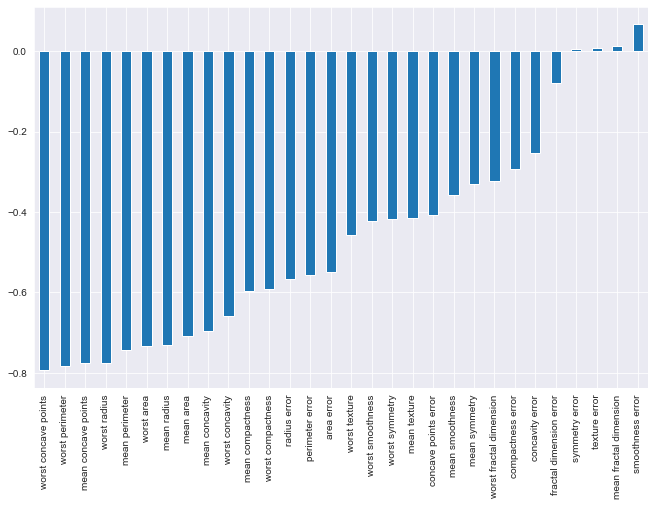

In [7]:
## since there are too many columns in the dataset, 
## let's focus only on the target column

plt.figure(figsize = (11, 7))
df.corr()['benign_0__mal_1'][: -1].sort_values().plot(kind = 'bar')

Let's grab the highly correlated features and drop the weakly correlated ones

In [8]:
cols_strong = list(df.corr()['benign_0__mal_1'][: -1].sort_values()[:-11].index)
cols_strong

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity',
 'mean compactness',
 'worst compactness',
 'radius error',
 'perimeter error',
 'area error',
 'worst texture',
 'worst smoothness',
 'worst symmetry',
 'mean texture']

## Preprocess Dataset for model

In [9]:
#X = df.drop(columns = cols_strong, axis = 1).values
X = df.drop(columns = 'benign_0__mal_1' , axis = 1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 101)

In [12]:
from sklearn.preprocessing import MinMaxScaler;
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Construct NN

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense, Dropout

In [16]:
X_train_scaled.shape

(426, 30)

In [17]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

## Because it's a binary class classification, we will use a sigmoid here
model.add(Dense(1, activation = 'sigmoid'))
## compiling...
model.compile (loss = 'binary_crossentropy', optimizer = 'adam')


In [18]:
model.fit(x = X_train_scaled, y = y_train, epochs = 500, validation_data = (X_test_scaled, y_test))

Epoch 1/500
14/14 [==============================] - 1s 25ms/step - loss: 0.7377 - val_loss: 0.7124
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6938 - val_loss: 0.6768
Epoch 3/500
14/14 [==============================] - 0s 7ms/step - loss: 0.6626 - val_loss: 0.6501
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6359 - val_loss: 0.6235
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6074 - val_loss: 0.5915
Epoch 6/500
14/14 [==============================] - 0s 7ms/step - loss: 0.5745 - val_loss: 0.5559
Epoch 7/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5383 - val_loss: 0.5170
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4993 - val_loss: 0.4758
Epoch 9/500
14/14 [==============================] - 0s 7ms/step - loss: 0.4587 - val_loss: 0.4341
Epoch 10/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4180 - val_loss: 0.3903
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.0488 - val_loss: 0.1188
Epoch 84/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0486 - val_loss: 0.1228
Epoch 85/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0499 - val_loss: 0.1217
Epoch 86/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.1222
Epoch 87/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0457 - val_loss: 0.1205
Epoch 88/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0462 - val_loss: 0.1216
Epoch 89/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0453 - val_loss: 0.1234
Epoch 90/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0456 - val_loss: 0.1195
Epoch 91/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0457 - val_loss: 0.1225
Epoch 92/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0449 - val_loss: 0.1222
Epoch 93/500


14/14 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.1325
Epoch 165/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0284 - val_loss: 0.1370
Epoch 166/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0280 - val_loss: 0.1364
Epoch 167/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0284 - val_loss: 0.1344
Epoch 168/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0285 - val_loss: 0.1423
Epoch 169/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0289 - val_loss: 0.1392
Epoch 170/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0284 - val_loss: 0.1367
Epoch 171/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0278 - val_loss: 0.1388
Epoch 172/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0304 - val_loss: 0.1414
Epoch 173/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0279 - val_loss: 0.1349
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0226 - val_loss: 0.1416
Epoch 246/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.1590
Epoch 247/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0176 - val_loss: 0.1453
Epoch 248/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0192 - val_loss: 0.1553
Epoch 249/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0171 - val_loss: 0.1466
Epoch 250/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0166 - val_loss: 0.1488
Epoch 251/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.1506
Epoch 252/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0197 - val_loss: 0.1542
Epoch 253/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0202 - val_loss: 0.1505
Epoch 254/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.1424
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.1693
Epoch 327/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.1726
Epoch 328/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.1686
Epoch 329/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.1697
Epoch 330/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.1718
Epoch 331/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0113 - val_loss: 0.1888
Epoch 332/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.1647
Epoch 333/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.1989
Epoch 334/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.1651
Epoch 335/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0128 - val_loss: 0.1837
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.2107
Epoch 408/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.2144
Epoch 409/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.2047
Epoch 410/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.2161
Epoch 411/500
14/14 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.2066
Epoch 412/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.2164
Epoch 413/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.2088
Epoch 414/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.2160
Epoch 415/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.2110
Epoch 416/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.2174
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.2867
Epoch 489/500
14/14 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.2614
Epoch 490/500
14/14 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.2723
Epoch 491/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.2697
Epoch 492/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.2777
Epoch 493/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.2907
Epoch 494/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.2860
Epoch 495/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.2694
Epoch 496/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.2817
Epoch 497/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.2819
Epoc

In [19]:
model_hist = pd.DataFrame(model.history.history)

<Axes: >

<Figure size 792x504 with 0 Axes>

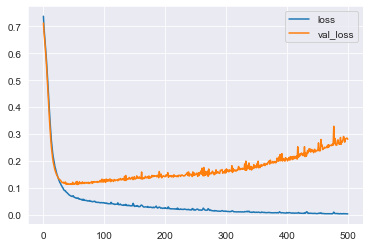

In [20]:
plt.figure(figsize = (11, 7))
model_hist.plot()

The divergence between the validation loss and model loss values is widening, it is clear that the model is overfitting on our training dataset. In order to over come this, we will be implementing an early stop in the training of our model
### Early Stop

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
#help(EarlyStopping)

In [22]:
## we will monitor the *validation loss*, which we will try to *minimize*. 
## We want it to monitor the values about *25 epochs* (i.e. a 5% of total epochs in this case) before coming to a stoo 
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [23]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

## Because it's a binary class classification, we will use a sigmoid here
model.add(Dense(1, activation = 'sigmoid'))
## compiling...
model.compile (loss = 'binary_crossentropy', optimizer = 'adam')


In [24]:
model.fit(x = X_train_scaled, 
          y = y_train, 
          epochs = 500, 
          validation_data = (X_test_scaled, y_test),
          callbacks = [early_stop])

Epoch 1/500
14/14 [==============================] - 1s 20ms/step - loss: 0.6733 - val_loss: 0.6550
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6423 - val_loss: 0.6240
Epoch 3/500
14/14 [==============================] - 0s 7ms/step - loss: 0.6045 - val_loss: 0.5791
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5572 - val_loss: 0.5303
Epoch 5/500
14/14 [==============================] - 0s 7ms/step - loss: 0.5066 - val_loss: 0.4775
Epoch 6/500
14/14 [==============================] - 0s 7ms/step - loss: 0.4585 - val_loss: 0.4272
Epoch 7/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4121 - val_loss: 0.3822
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3725 - val_loss: 0.3410
Epoch 9/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3375 - val_loss: 0.3069
Epoch 10/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3082 - val_loss: 0.2779
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.0490 - val_loss: 0.1001
Epoch 84/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0482 - val_loss: 0.1016
Epoch 85/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0513 - val_loss: 0.1006
Epoch 85: early stopping


Text(0, 0.5, 'Loss Values')

<Figure size 792x504 with 0 Axes>

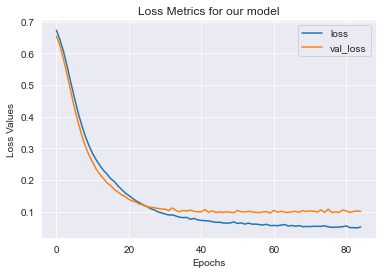

In [25]:
model_hist = pd.DataFrame(model.history.history)
plt.figure(figsize = (11, 7))
model_hist.plot()
plt.title('Loss Metrics for our model')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')

### Adding dropouts to reglularize
<strong>NOTE: </strong> this is not the best regularization technique according to new research; l1 and l2 are better options but we will implement this for simplicity for now...

In [26]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.25))

## Because it's a binary class classification, we will use a sigmoid here
model.add(Dense(1, activation = 'sigmoid'))
## compiling...
model.compile (loss = 'binary_crossentropy', optimizer = 'adam')


In [27]:
model.fit(x = X_train_scaled, 
          y = y_train, 
          epochs = 500, 
          validation_data = (X_test_scaled, y_test),
          callbacks = [early_stop])

Epoch 1/500
14/14 [==============================] - 1s 20ms/step - loss: 0.6749 - val_loss: 0.6427
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6410 - val_loss: 0.6089
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6077 - val_loss: 0.5681
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5706 - val_loss: 0.5238
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5334 - val_loss: 0.4829
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5027 - val_loss: 0.4428
Epoch 7/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4512 - val_loss: 0.4011
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4176 - val_loss: 0.3574
Epoch 9/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3873 - val_loss: 0.3183
Epoch 10/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3533 - val_loss: 0.2854
Epoch 11

14/14 [==============================] - 0s 8ms/step - loss: 0.0673 - val_loss: 0.0910
Epoch 84/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0692 - val_loss: 0.0797
Epoch 85/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0655 - val_loss: 0.0801
Epoch 86/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0529 - val_loss: 0.0737
Epoch 87/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0584 - val_loss: 0.0795
Epoch 88/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0689 - val_loss: 0.0811
Epoch 89/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0675 - val_loss: 0.0768
Epoch 90/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0683 - val_loss: 0.0825
Epoch 91/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0611 - val_loss: 0.0742
Epoch 92/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0625 - val_loss: 0.0799
Epoch 93/500


Text(0, 0.5, 'Loss Values')

<Figure size 792x504 with 0 Axes>

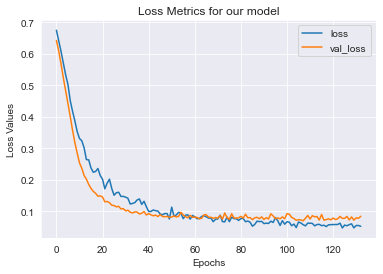

In [28]:
model_hist = pd.DataFrame(model.history.history)
plt.figure(figsize = (11, 7))
model_hist.plot()
plt.title('Loss Metrics for our model')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')

In [39]:
#y_pred = pd.Series(model.predict(X_test_scaled)).apply(lambda x: math.round(x[0] * 0.1))
y_pred = model.predict(X_test_scaled)
y_pred_round = []
for i in tqdm(y_pred):
    y_pred_round.append(np.round(i))
y_pred_round    

5/5 [==============================] - 0s 2ms/step


100%|█████████████████████████████████████████████████████████████████████████████| 143/143 [00:00<00:00, 71693.22it/s]


[array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], d

In [40]:
print ('Confusion Matrix\n', confusion_matrix(y_test, y_pred_round), '\n')
print ('Classification Report\n', classification_report(y_test, y_pred_round), '\n')

Confusion Matrix
 [[54  1]
 [ 2 86]] 

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143
 

